In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.metrics.pairwise import kernel_metrics, pairwise_distances, pairwise_kernels

from itertools import product

In [104]:
n = 1000
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
xx, yy = np.meshgrid(x, y)

X = np.array([x])
Y = np.array([y])

print(X.shape)


# plt.imshow([xx,yy])

(1, 1000)


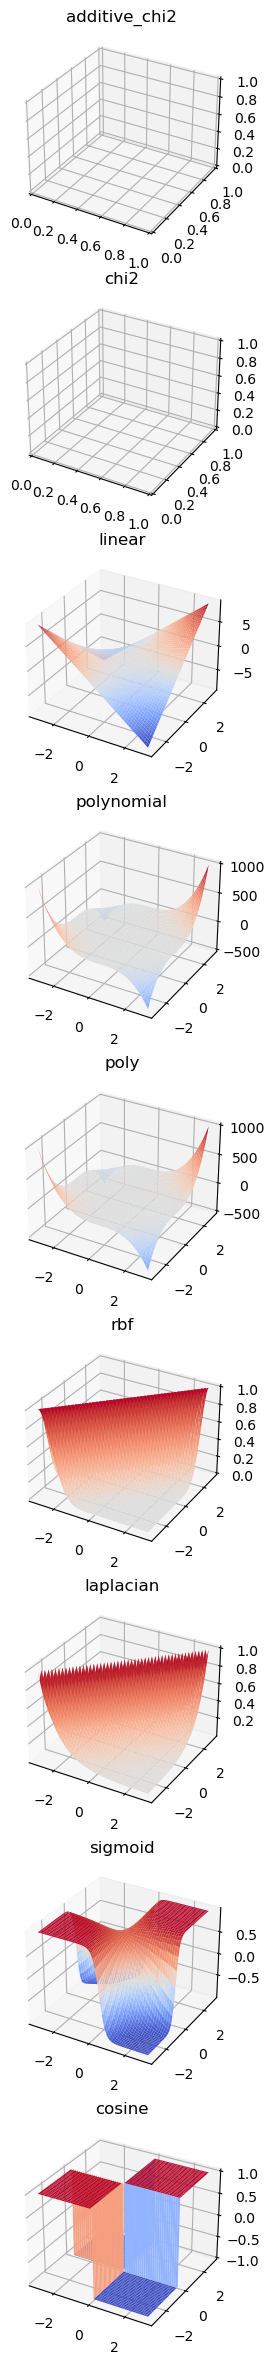

In [112]:
kernels = kernel_metrics()
kernels = kernels.keys()

fig, axs = plt.subplots(len(kernels), 1, figsize=(10,30), subplot_kw={"projection": "3d"})
for kernel,ax in zip(kernels,axs):
    ax.set_title(kernel)
    if kernel != 'additive_chi2' and kernel != 'chi2':
        K=pairwise_kernels(X.transpose(),X.transpose(), metric=kernel)
        ax.plot_surface(xx, yy, K, cmap='coolwarm', norm=colors.CenteredNorm())
# plt.colorbar()

# K = kernels['rbf'](X)



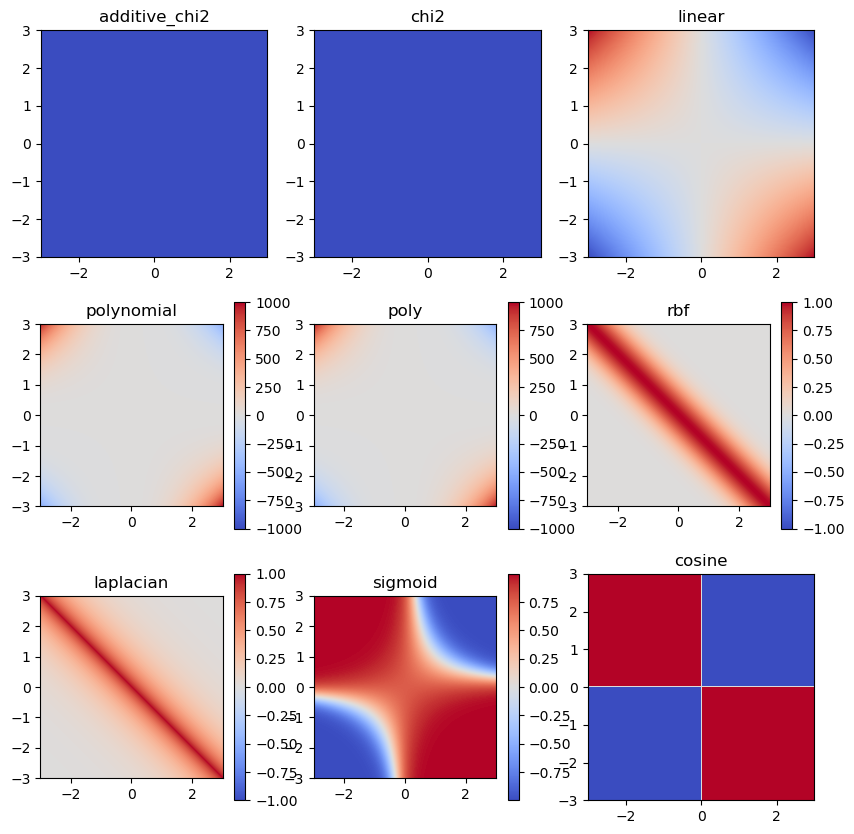

In [129]:
N = len(kernels)
fig, axs = plt.subplots(int(np.ceil(np.sqrt(N))), int(np.ceil(np.sqrt(N))), figsize=(10,10))
axs = axs.ravel()
for kernel,ax in zip(kernels,axs):
    ax.set_title(kernel)
    if kernel != 'additive_chi2' and kernel != 'chi2':
        K=pairwise_kernels(X.transpose(),X.transpose(), metric=kernel)
    else:
        K=np.zeros((len(X), len(X)))   
    im=ax.imshow(K, extent=2*[np.min(X), np.max(X)], cmap='coolwarm', norm=colors.CenteredNorm())
    if np.sum(K) != 0:
        plt.colorbar(im)